Библиотеки для работы с данными и математикой

In [292]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import math
import seaborn as sn

Получение данных из файла

In [293]:
df = pd.read_csv('../resources/Higher_Education_Students_Performance_Evaluation.csv')
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


Добавляем метрику SUCCESS по зданию: студент успешный/неуспешный на основании грейда

In [294]:
df['SUCCESS'] = df['GRADE'] > 3
df['SUCCESS'] = df['SUCCESS'].astype(int)
df

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,COURSE ID,GRADE,SUCCESS
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,1


Удалим столбец с номером, так как признаком он не является

In [295]:
students_id = df['STUDENT ID']
df = df.drop('STUDENT ID', axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,COURSE ID,GRADE,SUCCESS
0,2,2,3,3,1,2,2,1,1,1,...,1,3,2,1,2,1,1,1,1,0
1,2,2,3,3,1,2,2,1,1,1,...,1,3,2,3,2,2,3,1,1,0
2,2,2,2,3,2,2,2,2,4,2,...,1,2,2,1,1,2,2,1,1,0
3,1,1,1,3,1,2,1,2,1,2,...,2,3,2,2,1,3,2,1,1,0
4,2,2,1,3,2,2,1,3,1,4,...,1,2,2,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,2,1,2,1,3,3,9,5,1
141,1,1,2,4,2,2,2,1,4,2,...,1,3,2,2,1,5,3,9,5,1
142,1,1,1,4,2,2,2,1,1,1,...,1,3,3,2,1,4,3,9,1,0
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,5,3,9,4,1


Разделение данных

In [296]:
X = df.drop('SUCCESS', axis=1)
X = X.drop('GRADE', axis=1)
Y = df['SUCCESS']

In [297]:
X

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,COURSE ID
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,2,1,2,1,3,3,9
141,1,1,2,4,2,2,2,1,4,2,...,2,1,1,3,2,2,1,5,3,9
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,3,3,2,1,4,3,9
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,2,1,5,3,9


In [298]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    0
143    1
144    0
Name: SUCCESS, Length: 145, dtype: int32

In [299]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1          145 non-null    int64
 1   2          145 non-null    int64
 2   3          145 non-null    int64
 3   4          145 non-null    int64
 4   5          145 non-null    int64
 5   6          145 non-null    int64
 6   7          145 non-null    int64
 7   8          145 non-null    int64
 8   9          145 non-null    int64
 9   10         145 non-null    int64
 10  11         145 non-null    int64
 11  12         145 non-null    int64
 12  13         145 non-null    int64
 13  14         145 non-null    int64
 14  15         145 non-null    int64
 15  16         145 non-null    int64
 16  17         145 non-null    int64
 17  18         145 non-null    int64
 18  19         145 non-null    int64
 19  20         145 non-null    int64
 20  21         145 non-null    int64
 21  22         145 n

Отберем нужное количество признаков

In [300]:
columns_count = int(len(X.columns)**(1/2))
to_drop_count = len(X.columns) - columns_count
to_drop_count

26

Распределение данных

In [301]:
#cols = X.columns

#fig, axes = plt.subplots(len(cols), 1, figsize=(15, len(cols)*8))

#for i, column in enumerate(cols):
#    axes[i].scatter(range(len(X)), X[column], alpha=0.3)
#    axes[i].set_xlabel('Index')
#    axes[i].set_ylabel(column)

#plt.tight_layout()
#plt.show()

In [302]:
columns = X.columns.values
to_drop_columns = np.random.choice(columns, size=to_drop_count, replace=False)
X = X.drop(to_drop_columns, axis=1)
X

,1,2,4,12,30
0,2,2,3,2,1
1,2,2,3,3,3
2,2,2,3,2,2
3,1,1,3,2,2
4,2,2,3,3,2
...,...,...,...,...,...
140,2,1,3,2,3
141,1,1,4,1,3
142,1,1,4,4,3
143,2,1,4,4,3


Разделение на тренировочную и тестовую выборки

In [303]:
indexes = list(range(len(X)))
test_size = 0.2
random.seed(42)
random.shuffle(indexes)
split_index = int(len(X) * test_size)

X_train = X.iloc[indexes[split_index:]]
X_test = X.iloc[indexes[:split_index]]
Y_train = Y.iloc[indexes[split_index:]]
Y_test = Y.iloc[indexes[:split_index]]

In [304]:
X_train

,1,2,4,12,30
134,1,1,4,1,3
127,1,1,4,2,2
39,2,1,3,3,1
121,2,1,3,1,1
60,2,1,3,1,1
...,...,...,...,...,...
57,2,2,3,2,4
62,2,2,3,3,4
70,1,2,4,3,4
6,1,2,4,3,4


In [305]:
X_test

,1,2,4,12,30
137,1,1,5,2,4
18,1,1,4,2,3
81,3,2,3,2,4
51,2,1,3,2,3
88,1,2,4,4,3
112,2,1,3,1,2
130,1,1,3,2,3
30,2,2,5,1,4
133,1,1,5,1,3
120,2,1,3,3,2


In [306]:
Y_train

134    0
127    0
39     0
121    0
60     0
      ..
57     1
62     0
70     1
6      1
28     0
Name: SUCCESS, Length: 116, dtype: int32

In [307]:
Y_test

137    0
18     0
81     0
51     1
88     1
112    0
130    0
30     1
133    0
120    0
71     1
110    0
141    1
38     0
82     1
32     0
90     1
61     1
42     0
85     1
125    0
126    0
52     0
1      0
87     1
128    0
63     1
101    1
124    0
Name: SUCCESS, dtype: int32

Дерево решений

In [308]:
class TreeNode:

    def __init__(self, left = None, right = None, class_name = None, feature = None, div_value = None):
        self.left = left
        self.right = right
        self.class_name = class_name
        self.feature = feature
        self.div_value = div_value

    def __str__(self):
        return f'(left = {self.left}; right  = {self.right}; class_name = {self.class_name}; feature = {self.feature}; div_value = {self.div_value})'



def tree_to_string(root, depth=0):

        indentation = '        ' * depth * 2
        format = '--' * (depth + 1)

        if root.class_name is not None:
            print(f"{indentation}|{format} class_name = {'Успех' if root.class_name == 1 else 'Незачёт'}")

        else:
            feature = columns[root.feature]
            div_value = root.div_value

            print(f'{indentation}|{format} {feature} < {div_value}')
            tree_to_string(root.left, depth + 1)

            print(f'{indentation}|{format} {feature} >= {div_value}')
            tree_to_string(root.right, depth + 1)


Вычисление энтропии для определения чистоты подмножества

In [309]:
def calculate_entropy(y_values):
    if len(y_values) == 0:
        return 0

    p1 = np.mean(y_values == y_values[0])
    p2 = 1 - p1

    if p1  == 1 or p2 == 1:
        return 0

    return -(p1 * math.log2(p1) + p2 * math.log2(p2))

Вычисление информационного выигрыша при разбиении по данному признаку X

In [310]:
def calculate_gain(x, y):
    #  энтропия до разделения
    before = calculate_entropy(y.values)

    #  находим уникальные значения признака и количество вхождений каждого уникального признака
    values, occurrences = np.unique(x, return_counts=True)
    total = len(y.values)

    #  массив энтропий для того, чтобы получить взвешанную энтропию (ВЭ потом будет использоваться для определения выгоды от разделения по данному признаку)
    entropies = []
    #  пробегаюсь по всем уникальным значениям признака
    for i, value in enumerate(values):

        #  вычисляю вероятность (количество объектов с таким признаком / общее количество объектов)
        prob = occurrences[i] / total

        #  все метки данного значения X
        cur_labels = y[x == value]

        #  выщитываю энтропию меток полученных значений меток для данного уникального значения
        tmp_entropy = prob * calculate_entropy(cur_labels.values)

        #  добавляю в массив энтропий
        entropies.append(tmp_entropy)

    return before - sum(entropies)

Построение модели. Способ ограничения: глубина дерева

In [311]:
def build_nodes(x, y, cur_depth, max_depth):
    y_values = y.values

    #  если все метки одинаковые, то энтропия == 0, значит нашли лист
    if len(np.unique(y_values)) == 1:
        return TreeNode(class_name = y_values[0])

    #  если текущая длина превысила предельную, то опеределяем класс по принципу большинства
    if cur_depth >= max_depth:
        labels = np.unique(y_values)
        label = y_values[0]
        l1_count = 0
        for i in range(len(y_values)):
            if y_values[i] == label:
                l1_count += 1
        l2_count = len(y_values) - l1_count
        return TreeNode(class_name = labels[0] if l1_count >= l2_count else labels[1])

    max_gain = 0
    final_feature_ind = None
    final_div_value = None

    # print(X)
    #  для каждого признака признакам
    for cur_column_ind in range(x.shape[1]):
        #  рассматриваем возможность разделения по каждому уникальному значению
        for div_value in np.unique(x.iloc[:, cur_column_ind]):
            #  делим
            left = x.iloc[:, cur_column_ind] < div_value
            right = x.iloc[:, cur_column_ind] >= div_value

            #  если нет смысла в разделении, пропускаем значение признака
            if sum(left) == 0 or sum(right) == 0:
                continue

            #  высчитываем выигрыш
            cur_gain = calculate_gain(left, y)
            #  запоминаем
            if cur_gain > max_gain:
                max_gain = cur_gain
                final_feature_ind = cur_column_ind
                final_div_value = div_value

    #  если выигрыша не обнаружено, поступаем как в случае с превышением глубины (большинство)
    if max_gain == 0 or final_feature_ind is None or final_div_value is None:
        labels = np.unique(y_values)
        label = y_values[0]
        l1_count = 0
        for i in range(len(y_values)):
            if y_values[i] == label:
                l1_count += 1
        l2_count = len(y_values) - l1_count
        return TreeNode(class_name = labels[0] if l1_count >= l2_count else labels[1])

    #  определяем индексы разделений
    left_x_ind = x.iloc[:, final_feature_ind] < final_div_value
    right_x_ind = x.iloc[:, final_feature_ind] >= final_div_value

    #  строим левое и правое деревья
    left_tree_node = build_nodes(x[left_x_ind], y[left_x_ind], cur_depth + 1, max_depth)
    right_tree_node = build_nodes(x[right_x_ind], y[right_x_ind], cur_depth + 1, max_depth)

    return TreeNode(left = left_tree_node,
                    right = right_tree_node,
                    feature = final_feature_ind,
                    div_value = final_div_value)

Создание модели на тренировочных данных и вывод в удобном виде

In [312]:
tree_depth = 4
model = build_nodes(X_train, Y_train, 0, tree_depth)

tree_to_string(model)

|-- 5 < 2
                |---- 4 < 5
                                |------ class_name = Незачёт
                |---- 4 >= 5
                                |------ class_name = Успех
|-- 5 >= 2
                |---- 1 < 3
                                |------ 3 < 5
                                                |-------- 5 < 4
                                                                |---------- class_name = Незачёт
                                                |-------- 5 >= 4
                                                                |---------- class_name = Незачёт
                                |------ 3 >= 5
                                                |-------- 4 < 4
                                                                |---------- class_name = Незачёт
                                                |-------- 4 >= 4
                                                                |---------- class_name = Успех
                |---- 1 >= 3
        

Предсказание на тестовых данных

In [313]:
def predict(x_object_values, root):
    if root.class_name is not None:
        return root.class_name

    if x_object_values[root.feature] < root.div_value:
        return predict(x_object_values, root.left)
    else:
        return predict(x_object_values, root.right)



def predict_all(x, model):
    x_values = x.values
    prediction = []
    for row in x_values:
        prediction.append(predict(row, model))
    return prediction

In [314]:
prediction = predict_all(X_test, model)
prediction

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [315]:
matches_count = 0
for j in range(len(Y_test)):
    if prediction[j] == Y_test.values[j]:
        matches_count += 1
predicted_percent = 100 * matches_count / len(Y_test)
print("Результат точности: ", predicted_percent)

Результат точности:  58.62068965517241


Матрица ошибок

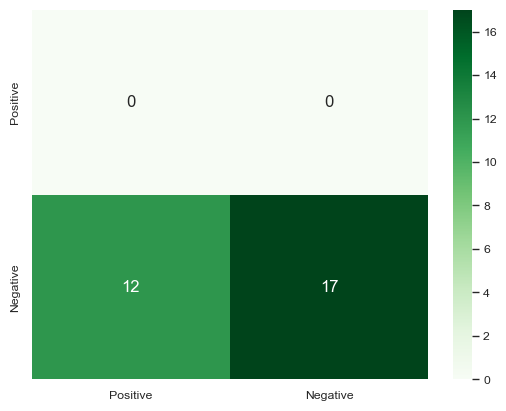

In [316]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for i in range(len(Y_test)):
    if prediction[i] == 1:
        if Y_test.values[i] == 1:
            true_positive += 1
        else:
            false_positive += 1
    else:
        if Y_test.values[i] == 1:
            false_negative += 1
        else:
            true_negative += 1
            
confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
cm_indeces = ['Positive', 'Negative']
df_cm = pd.DataFrame(confusion_matrix, index = cm_indeces, columns = cm_indeces)
sn.set_context("paper", rc={"font.size":12,"axes.titlesize":8,"axes.labelsize":5})
sn.heatmap(df_cm, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [317]:
precision = true_positive / (true_positive + false_positive)
print(f'precision = {precision * 100}%')

ZeroDivisionError: division by zero

In [ ]:
recall = true_positive / (true_positive + false_negative)
print(f'recall = {recall * 100}%')

Оценка качества модели

AUC-ROC (площадь под кривой ошибок)

In [ ]:
def get_tpr_fpr(div_value, Y_test, probas):
    predicted_values = []
    for i in range(len(probas)):
        if probas[i] >= div_value:
            predicted_values.append(1)
        else:
            predicted_values.append(0)
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i in range(len(Y_test)):
        if predicted_values[i] == 1:
            if Y_test.values[i] == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if Y_test.values[i] == 1:
                false_negative += 1
            else:
                true_negative += 1

    true_positive_rate = (true_positive) / (true_positive + false_negative)
    false_positive_rate = (false_positive) / (false_positive + true_negative)
    return true_positive_rate, false_positive_rate

In [ ]:
def get_all_tprs(div_values, Y_test, probas):
    tprs = []
    for div_value in div_values:
        tprs.append(get_tpr_fpr(div_value, Y_test, probas)[0])
    return tprs

def get_all_fprs(div_values, Y_test, probas):
    fprs = []
    for div_value in div_values:
        fprs.append(get_tpr_fpr(div_value, Y_test, probas)[1])
    return fprs

In [ ]:
print(f'Исходная глубина дерева: {tree_depth}')

In [ ]:
def calculate_proba(X_values, root, depth=0):
    if root.class_name is not None:
        return 1 / depth

    if X_values[root.feature] < root.div_value:
        return calculate_proba(X_values, root.left, depth + 1)
    else:
        return calculate_proba(X_values, root.right, depth + 1)

In [ ]:
def calculate_probas(X, model):
    X_values = X.values
    probas = []
    for row in X_values:
        probas.append(calculate_proba(row, model))
    return probas

In [318]:
probas = np.sort(calculate_probas(X_test, model))
unique_probas = np.unique(probas)

In [319]:
tprs = get_all_tprs(np.unique(probas), Y_test, probas)
fprs = get_all_fprs(np.unique(probas), Y_test, probas)

In [320]:
tprs

[1.0, 0.0]

In [321]:
fprs

[1.0, 0.058823529411764705]

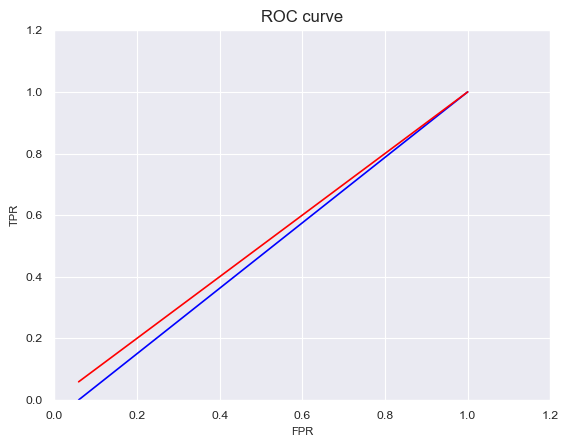

In [322]:
plt.title('ROC curve', fontsize=12)
plt.xlabel('FPR', fontsize=8)
plt.ylabel('TPR', fontsize=8)
plt.plot(fprs, tprs, 'b', fprs, fprs, 'r')
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.show()

In [323]:
def auc_roc_curve(true_labels, predicted_scores):
    # Сортируем предсказанные оценки в порядке убывания
    sorted_indices = np.argsort(predicted_scores)[::-1]
    sorted_labels = true_labels[sorted_indices]
    
    # Находим количество положительных и отрицательных примеров
    num_positive = np.sum(sorted_labels)
    num_negative = len(sorted_labels) - num_positive
    
    # Инициализируем переменные для подсчета AUC ROC
    tp = 0  # true positive
    fp = 0  # false positive
    auc_roc = 0
    
    # Проходим по отсортированным меткам и вычисляем AUC ROC
    for label in sorted_labels:
        if label == 1:
            tp += 1
        else:
            fp += 1
            auc_roc += tp / num_positive * (1 / num_negative)
    
    #return auc_roc
    plt.figure()
    lw = 2
    plt.plot(fp, tp, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

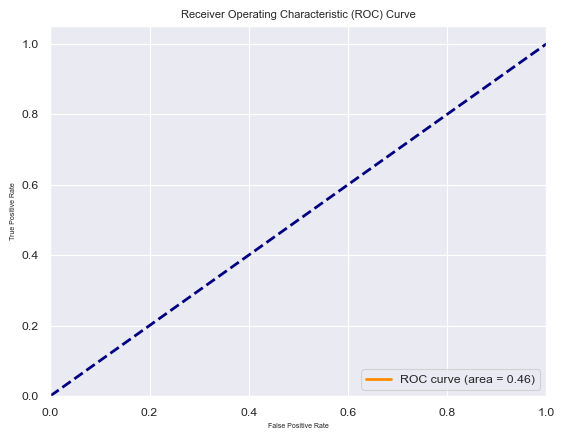

In [324]:
auc_roc_curve(Y_test.values, prediction)